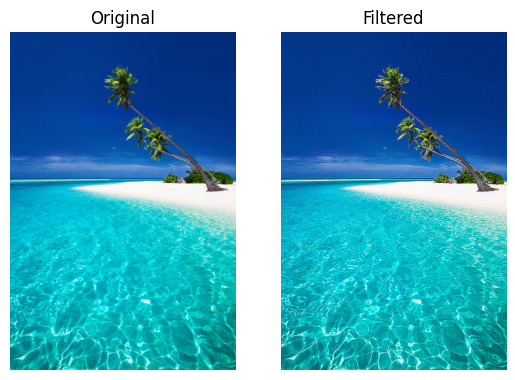

In [1]:
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization

# Define a kernel for edge enhancement
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
# This kernel is an edge-enhancement filter designed to emphasize intensity differences.

# Function to apply the custom kernel to a color image
def apply_custom_filter_color(frame, kernel):
    # Split the input frame into its Blue, Green, and Red channels
    b, g, r = cv2.split(frame)
    
    # Apply the custom kernel to each channel separately
    b_filtered = cv2.filter2D(b, -1, kernel)  # Blue channel
    g_filtered = cv2.filter2D(g, -1, kernel)  # Green channel
    r_filtered = cv2.filter2D(r, -1, kernel)  # Red channel
    
    # Merge the filtered channels back into a single color image
    filtered_frame = cv2.merge([b_filtered, g_filtered, r_filtered])
    return filtered_frame

# Load the image in BGR format (default for OpenCV)
image = cv2.imread('./data/beach-blue.jpg')

# Convert the image to RGB format for correct color display in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply the custom filter to the original image
image_f = apply_custom_filter_color(image, kernel)

# Convert the filtered image to RGB format for display
image_f_rgb = cv2.cvtColor(image_f, cv2.COLOR_BGR2RGB)

# Plot the original and filtered images side by side
plt.subplot(1, 2, 1)  # Create the first subplot
plt.imshow(image_rgb)  # Display the original image
plt.title('Original')  # Add a title to the first subplot
plt.axis(False)  # Turn off the axes for better visualization

plt.subplot(1, 2, 2)  # Create the second subplot
plt.imshow(image_f_rgb)  # Display the filtered image
plt.title('Filtered')  # Add a title to the second subplot
plt.axis(False)  # Turn off the axes for better visualization

# Display the plots
plt.show()


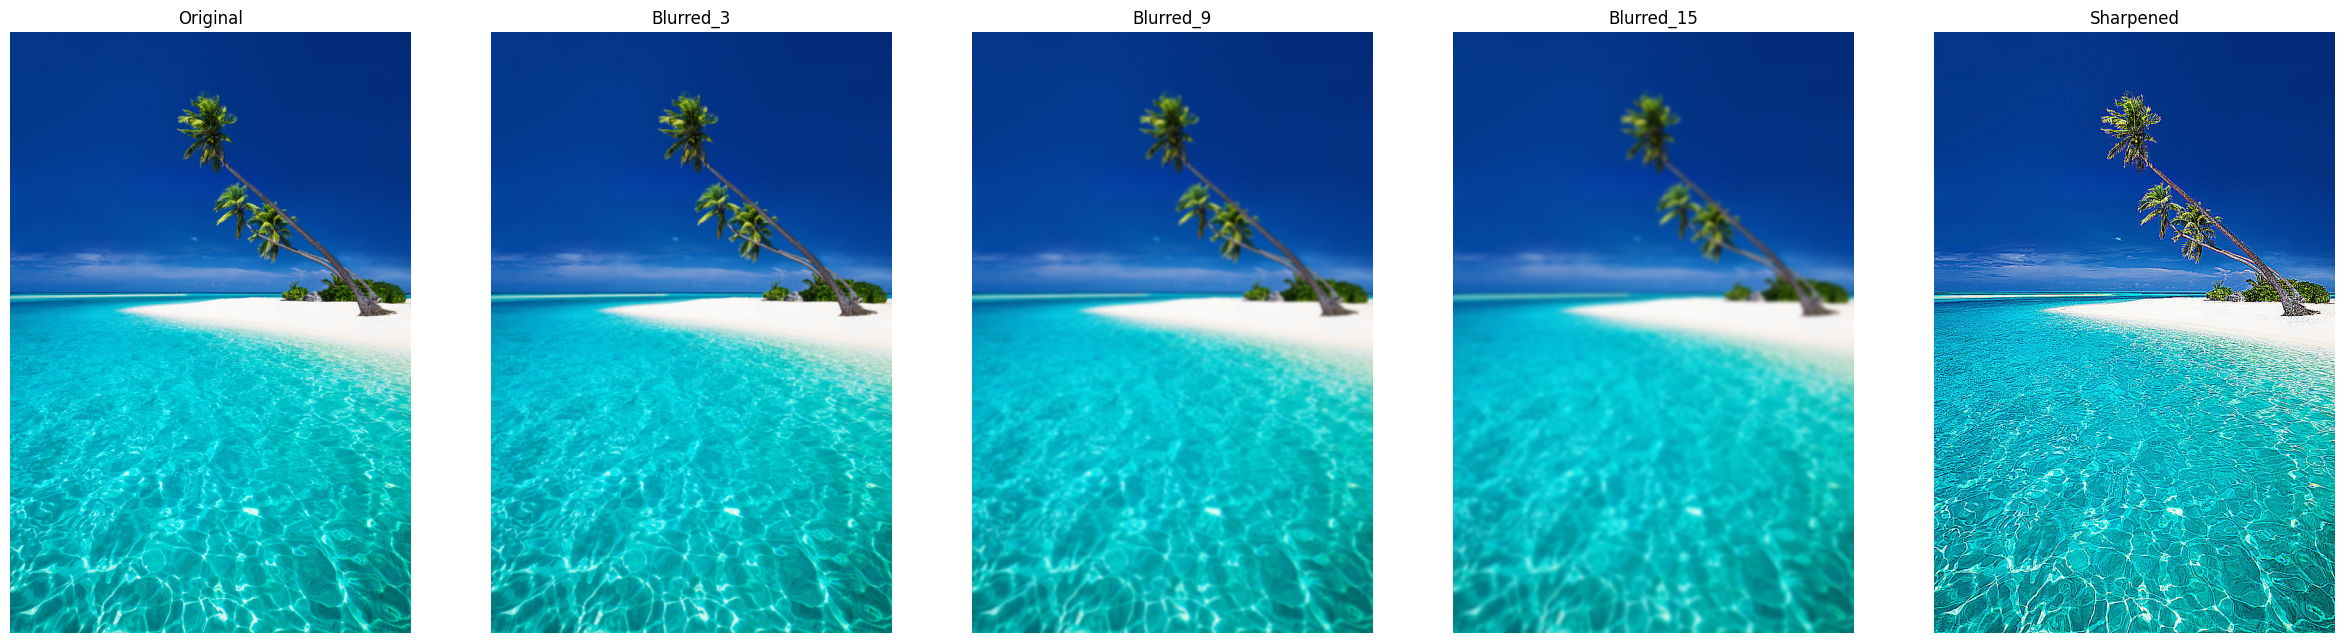

In [2]:
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for kernel operations
import matplotlib.pyplot as plt  # Matplotlib for visualization

# Load the image in BGR format (default for OpenCV)
image = cv2.imread('./data/beach-blue.jpg')

# Convert the image to RGB format for correct color visualization in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define kernel sizes for Gaussian blurring (small, medium, large)
kernelSizes = [(3, 3), (9, 9), (15, 15)]

# --- Blurring the Image ---
# Apply Gaussian blurring with a 3x3 kernel (mild blur)
blurred_3 = cv2.GaussianBlur(image_rgb, kernelSizes[0], 0)

# Apply Gaussian blurring with a 9x9 kernel (moderate blur)
blurred_9 = cv2.GaussianBlur(image_rgb, kernelSizes[1], 0)

# Apply Gaussian blurring with a 15x15 kernel (strong blur)
blurred_15 = cv2.GaussianBlur(image_rgb, kernelSizes[2], 0)

# --- Sharpening the Image ---
# Define a sharpening kernel to enhance edges
# The kernel applies a weighted sum where the center pixel (9) is emphasized
# and the surrounding pixels (-1) are subtracted to enhance edge contrast
kernel_2 = np.array([[-1, -1, -1], 
                     [-1,  9, -1], 
                     [-1, -1, -1]])

# Apply the sharpening filter using the defined kernel
# cv2.filter2D convolves the kernel with the image to produce the sharpened effect
sharpened = cv2.filter2D(image_rgb, -1, kernel_2)

# --- Display the Results ---
# Create a figure with a large size to show the results side by side
plt.figure(figsize=(30, 15))

# Display the original image
plt.subplot(1, 5, 1)
plt.imshow(image_rgb)  # Use RGB format for correct color display
plt.title('Original')  # Title for the first subplot
plt.axis(False)

# Display the mildly blurred image (3x3 Gaussian blur)
plt.subplot(1, 5, 2)
plt.imshow(blurred_3)
plt.title('Blurred_3')  # Title for the second subplot
plt.axis(False)

# Display the moderately blurred image (9x9 Gaussian blur)
plt.subplot(1, 5, 3)
plt.imshow(blurred_9)
plt.title('Blurred_9')  # Title for the third subplot
plt.axis(False)

# Display the strongly blurred image (15x15 Gaussian blur)
plt.subplot(1, 5, 4)
plt.imshow(blurred_15)
plt.title('Blurred_15')  # Title for the fourth subplot
plt.axis(False)

# Display the sharpened image
plt.subplot(1, 5, 5)
plt.imshow(sharpened)
plt.title('Sharpened')  # Title for the fifth subplot
plt.axis(False)

# Render the entire figure
plt.show()


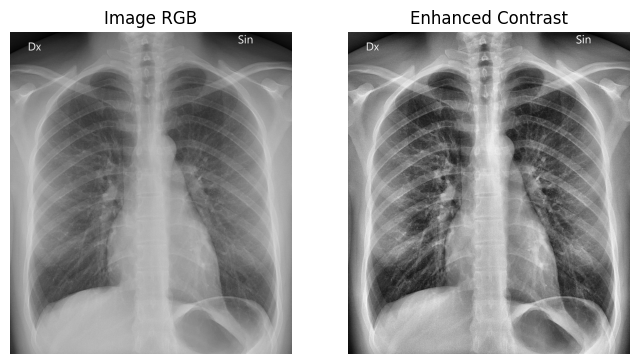

In [3]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Load the Image ---
# Load the image in BGR format (default for OpenCV)
image = cv2.imread('./data/xray.jpg')

# Convert the image to RGB format for proper color display in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Create CLAHE Object ---
# Create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
# clipLimit: Threshold for contrast limiting
# tileGridSize: Size of the grid for the histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Convert the original image to grayscale for contrast enhancement
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to the grayscale image
cl1 = clahe.apply(gray)

# --- Visualize the Results ---
# Create a figure for displaying the images
plt.figure(figsize=(8, 6))

# Display the original RGB image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')  # Add a title
plt.axis('off')  # Turn off axes for cleaner display

# Display the CLAHE-enhanced grayscale image
plt.subplot(1, 2, 2)
plt.imshow(cl1, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Enhanced Contrast')  # Add a title
plt.axis('off')  # Turn off axes for cleaner display

# Show the plots
plt.show()


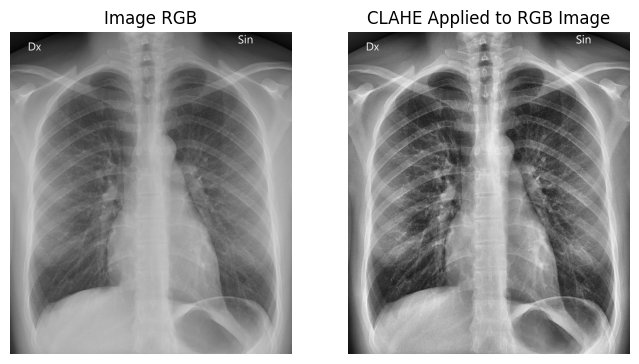

In [4]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Convert to LAB Color Space ---
# Convert the image from BGR to LAB color space
# LAB separates luminance (L channel) from chromaticity (A and B channels)
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# --- Split LAB Channels ---
# Split the LAB image into its individual channels
# L channel: Lightness
# A channel: Green-Red color components
# B channel: Blue-Yellow color components
l_channel, a_channel, b_channel = cv2.split(lab)

# --- Apply CLAHE to Lightness Channel ---
# Create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
# clipLimit: Limits contrast amplification to avoid noise over-enhancement
# tileGridSize: Size of the grid for histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the L (lightness) channel for contrast enhancement
cl1 = clahe.apply(l_channel)

# --- Merge Enhanced L-Channel with A and B Channels ---
# Combine the CLAHE-enhanced L channel with the original A and B channels
lab_clahe = cv2.merge((cl1, a_channel, b_channel))

# --- Convert LAB Back to RGB ---
# Convert the LAB image back to RGB color space for visualization
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# --- Visualize the Results ---
plt.figure(figsize=(8, 6))  # Create a figure for side-by-side comparison

# Display the original RGB image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)  # Show the RGB image
plt.title('Image RGB')  # Add title for the subplot
plt.axis('off')  # Turn off axes for cleaner display

# Display the CLAHE-enhanced RGB image
plt.subplot(1, 2, 2)
plt.imshow(image_clahe)  # Show the RGB image after applying CLAHE
plt.title("CLAHE Applied to RGB Image")  # Add title for the subplot
plt.axis('off')  # Turn off axes for cleaner display

# Show both plots
plt.show()


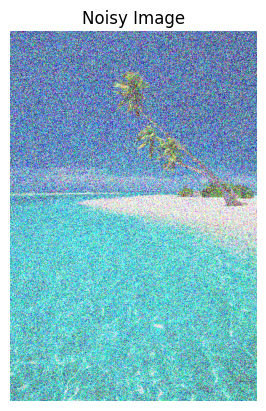

In [5]:
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Load the Image ---
# Load the image in BGR format (default for OpenCV)
image = cv2.imread('./data/beach-blue.jpg')

# --- Generate Noise ---
# Generate random Gaussian noise
# np.random.normal(mean, std_dev, shape) generates a noise matrix with specified mean and standard deviation
noise = np.random.normal(80, 150, image.shape)  # Mean=80, StdDev=150, Shape=same as image

# Add the noise to the original image
noisy_image = image + noise  # Element-wise addition of noise to the image

# Clip the pixel values to stay within the valid range [0, 255]
# Convert the result to unsigned 8-bit integers (uint8) to represent valid pixel intensities
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# --- Convert BGR to RGB for Visualization ---
# Convert the noisy image from BGR (OpenCV's format) to RGB (for Matplotlib display)
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

# --- Display the Noisy Image ---
plt.imshow(noisy_image)  # Display the noisy image
plt.title("Noisy Image")  # Add a title to the plot
plt.axis('off')  # Turn off axes for cleaner visualization
plt.show()  # Render the plot


(900, 600, 3)
(112, 75, 3)


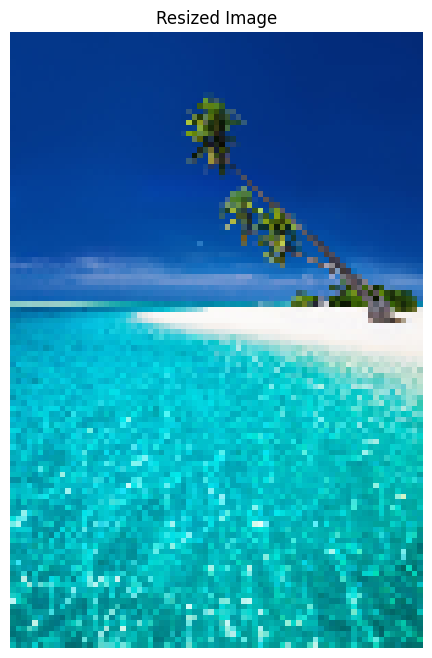

In [6]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Image Shape ---
# Get the dimensions of the image (height, width, and channels)
height, width, _ = image.shape
print(image.shape)  # Print the original image dimensions (Height, Width, Channels)

# --- Convert BGR to RGB ---
# Convert the image from BGR (default for OpenCV) to RGB for correct visualization
image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Resize the Image ---
# Calculate the new dimensions for resizing
new_width = int(width / 8)  # Scale down the width by a factor of 8
new_height = int(height / 8)  # Scale down the height by a factor of 8
new_points = (new_width, new_height)  # Tuple containing the new dimensions (width, height)

# Resize the image using the new dimensions
# interpolation=cv2.INTER_LINEAR: Bilinear interpolation for resizing
rescaled_img = cv2.resize(image_, new_points, interpolation=cv2.INTER_LINEAR)

print(rescaled_img.shape)  # Print the resized image dimensions

# --- Display the Resized Image ---
# Create a figure to display the resized image
plt.figure(figsize=(12, 8))  # Set the figure size

# Display the resized image
plt.imshow(rescaled_img)  # Use Matplotlib to visualize the image
plt.title("Resized Image")  # Add a title to the plot
plt.axis('off')  # Turn off axes for cleaner visualization
plt.show()  # Render the plot


(75, 75, 3)


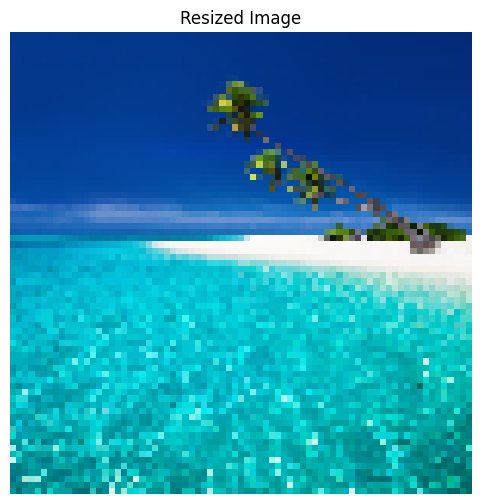

In [7]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Get Image Dimensions ---
# Extract the height, width, and number of channels from the image
height, width, _ = image.shape

# --- Convert BGR to RGB ---
# Convert the image from BGR (OpenCV's default format) to RGB for Matplotlib display
image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Define New Dimensions ---
# Calculate the new width and height for resizing
# Scale the width by a factor of 8
new_width = int(width / 8)
# Alternatively, instead of maintaining the aspect ratio, resize the image into a square
new_points = (new_width, new_width)  # Tuple for new width and height (both equal)

# --- Resize the Image ---
# Resize the image to the new dimensions using bilinear interpolation
rescaled_img = cv2.resize(image_, new_points, interpolation=cv2.INTER_LINEAR)

# Print the shape of the resized image for verification
print(rescaled_img.shape)

# --- Display the Resized Image ---
# Create a figure for displaying the resized image
plt.figure(figsize=(8, 6))  # Set the figure size for the plot

# Display the resized image using Matplotlib
plt.imshow(rescaled_img)  # Use RGB format for accurate color representation
plt.title("Resized Image")  # Add a title to the plot
plt.axis('off')  # Turn off axes for cleaner visualization
plt.show()  # Render the plot


(600, 400, 3)


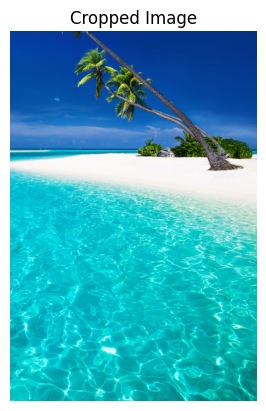

In [8]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Cropping an Image ---
# Crop the image by slicing the array
# image[y_start:y_end, x_start:x_end]
# This crops the image starting at (200, 200) and ending at (800, 800) in pixel coordinates
cropped_image = image[200:800, 200:800]

# --- Print Shape of Cropped Image ---
# Print the dimensions of the cropped image (Height, Width, Channels)
print(cropped_image.shape)

# --- Display the Cropped Image ---
# Convert BGR (default OpenCV format) to RGB for proper visualization
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# Display the cropped image using Matplotlib
plt.imshow(cropped_image_rgb)  # Use RGB format for accurate color representation
plt.title("Cropped Image")  # Add a title to the plot
plt.axis('off')  # Turn off axes for cleaner visualization
plt.show()  # Render the plot


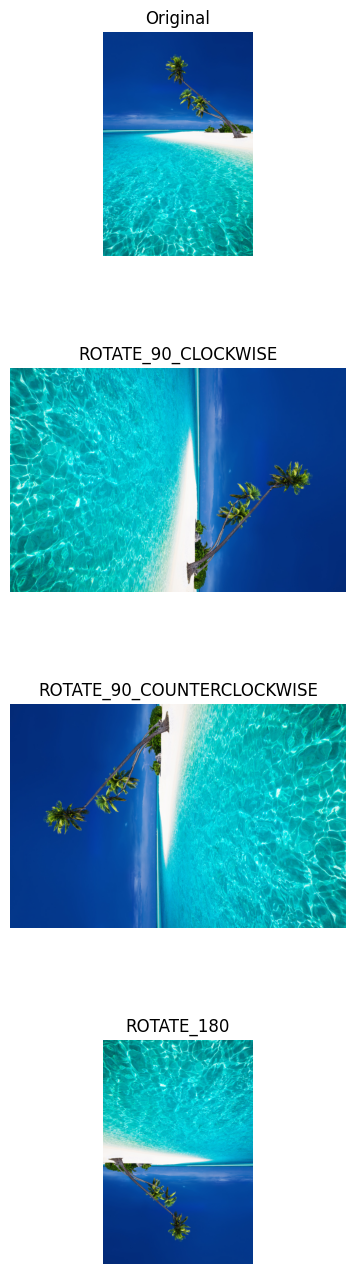

In [9]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Convert BGR to RGB ---
# Convert the original image from BGR (default for OpenCV) to RGB
image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Rotate the Image ---
# Rotate the image 90 degrees clockwise
rotated_90c = cv2.rotate(image_r, cv2.ROTATE_90_CLOCKWISE)

# Rotate the image 90 degrees counterclockwise
rotated_90ac = cv2.rotate(image_r, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Rotate the image 180 degrees
rotated_180 = cv2.rotate(image_r, cv2.ROTATE_180)

# --- Display the Results ---
# Create a figure to display all rotations
plt.figure(figsize=(20, 16))  # Set the figure size

# Original Image
plt.subplot(4, 1, 1)  # Create the first subplot
plt.imshow(image_r)  # Display the original image
plt.title('Original')  # Add a title for the first subplot
plt.axis('off')  # Turn off axes for cleaner visualization

# 90 Degrees Clockwise
plt.subplot(4, 1, 2)  # Create the second subplot
plt.imshow(rotated_90c)  # Display the rotated image
plt.title('ROTATE_90_CLOCKWISE')  # Add a title for the second subplot
plt.axis('off')  # Turn off axes

# 90 Degrees Counterclockwise
plt.subplot(4, 1, 3)  # Create the third subplot
plt.imshow(rotated_90ac)  # Display the rotated image
plt.title('ROTATE_90_COUNTERCLOCKWISE')  # Add a title for the third subplot
plt.axis('off')  # Turn off axes

# 180 Degrees
plt.subplot(4, 1, 4)  # Create the fourth subplot
plt.imshow(rotated_180)  # Display the rotated image
plt.title('ROTATE_180')  # Add a title for the fourth subplot
plt.axis('off')  # Turn off axes

# Adjust the space between subplots for better layout
plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

# Render the plot
plt.show()


Height and width of original image: 900 600


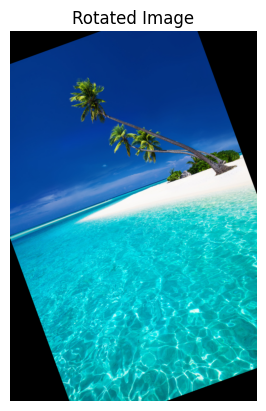

In [10]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Load and Convert Image ---
# Load the image in BGR format (default for OpenCV)
image = cv2.imread('./data/beach-blue.jpg')

# Convert the image to RGB for proper visualization in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Get Image Dimensions ---
# Extract the height and width of the image
height, width = image_rgb.shape[:2]  # Only take the first two values (height and width)
print("Height and width of original image:", height, width)

# --- Define the Center of Rotation ---
# Calculate the center of the image (width/2, height/2)
center = (width / 2, height / 2)  # Center point for rotation

# --- Create Rotation Matrix ---
# Generate a 2D rotation matrix using cv2.getRotationMatrix2D
# center: Point around which to rotate
# angle: Angle of rotation in degrees (positive for counterclockwise, negative for clockwise)
# scale: Scale factor for resizing the image during rotation
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=20, scale=1)

# --- Rotate the Image ---
# Apply the rotation using cv2.warpAffine
# src: Input image
# M: Rotation matrix
# dsize: Size of the output image (same as input here)
rotated_image = cv2.warpAffine(src=image_rgb, M=rotate_matrix, dsize=(width, height))

# --- Display the Rotated Image ---
plt.imshow(rotated_image)  # Display the rotated image
plt.title("Rotated Image")  # Add a title to the plot
plt.axis('off')  # Turn off axes for cleaner visualization
plt.show()  # Render the plot


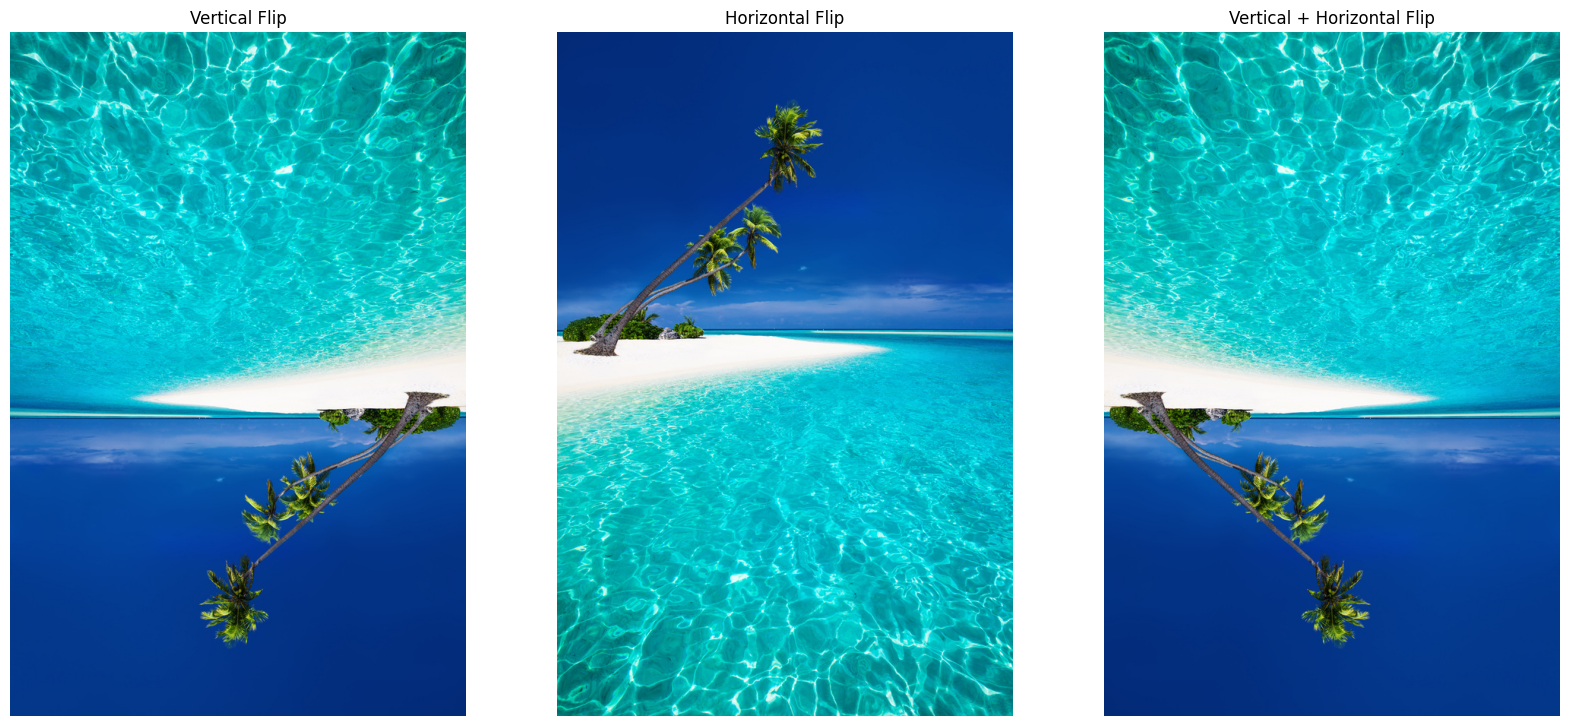

In [11]:
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt  # Matplotlib for visualization

# --- Convert BGR to RGB ---
# Convert the image from BGR (default for OpenCV) to RGB for proper visualization in Matplotlib
image_f = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Flip the Image ---
# Flip the image vertically (around the x-axis)
flipped_v = cv2.flip(image_f, 0)  # 0 indicates vertical flip

# Flip the image horizontally (around the y-axis)
flipped_h = cv2.flip(image_f, 1)  # 1 indicates horizontal flip

# Flip the image both vertically and horizontally (around both axes)
flipped_vh = cv2.flip(image_f, -1)  # -1 indicates both vertical and horizontal flip

# --- Display the Results ---
# Create a figure to display the flipped images
plt.figure(figsize=(20, 16))  # Set the figure size

# Display the vertically flipped image
plt.subplot(1, 3, 1)  # Create the first subplot
plt.imshow(flipped_v)  # Display the vertically flipped image
plt.title("Vertical Flip")  # Add a title to the first subplot
plt.axis('off')  # Turn off axes for cleaner visualization

# Display the horizontally flipped image
plt.subplot(1, 3, 2)  # Create the second subplot
plt.imshow(flipped_h)  # Display the horizontally flipped image
plt.title("Horizontal Flip")  # Add a title to the second subplot
plt.axis('off')  # Turn off axes

# Display the vertically and horizontally flipped image
plt.subplot(1, 3, 3)  # Create the third subplot
plt.imshow(flipped_vh)  # Display the vertically and horizontally flipped image
plt.title("Vertical + Horizontal Flip")  # Add a title to the third subplot
plt.axis('off')  # Turn off axes

# Adjust the space between subplots for better layout
plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

# Render the plot
plt.show()
